**IMPORT PYTHON LIBRARIES**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path= "/content/banking details data set.csv"
bank_details= pd.read_csv(file_path)

**OVERVIEW OF DATA SET AND ITS FEATURES**

In [ ]:
print(bank_details.info())

In [ ]:
print(bank_details.isnull().sum())

In [ ]:
print(bank_details.duplicated().sum())

In [ ]:
print(bank_details.columns)

In [ ]:
print(bank_details.head())

In [ ]:

# Create a dictionary with sample data
data = {'Married/Single': ['single', 'married', 'single'],
        'House_Ownership': ['norent_noown', 'rented', 'norent_noown'],
        'Car_Ownership': ['Yes', 'No', 'Yes']}

# Create a DataFrame using the sample data
df = pd.DataFrame(data)

# Binary encoding
df['Married/Single_encoded'] = df['Married/Single'].map({'single': 0, 'married': 1})
df['House_Ownership_encoded'] = df['House_Ownership'].map({'norent_noown': 0, 'rent': 1})
df['Car_Ownership_encoded'] = df['Car_Ownership'].map({'No': 0, 'Yes': 1})

# Display the resulting DataFrame
print(df)


In [ ]:
# Binary encoding for 'Married/Single' in bank_details
bank_details['Married/Single_encoded'] = bank_details['Married/Single'].map({'single': 0, 'married': 1})

# Binary encoding for 'House_Ownership' in bank_details
bank_details['House_Ownership_encoded'] = bank_details['House_Ownership'].map({'norent_noown': 0, 'rent': 1})

# Binary encoding for 'Car_Ownership' in bank_details
bank_details['Car_Ownership_encoded'] = bank_details['Car_Ownership'].map({'No': 0, 'Yes': 1})

# Display the first few rows of the updated bank_details dataframe
print(bank_details.head())

In [11]:
# Concatenate bank_details and df
final_df = pd.concat([bank_details, df[['Married/Single_encoded', 'House_Ownership_encoded', 'Car_Ownership_encoded']]], axis=1)


In [12]:
columns_to_include = ['Id', 'Income', 'Age', 'Experience', 'Married/Single',
                      'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
                      'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']

final_df = pd.concat([bank_details[columns_to_include], df[['Married/Single_encoded',
                           'House_Ownership_encoded', 'Car_Ownership_encoded']]], axis=1)


In [ ]:
print(final_df.columns.tolist())

In [ ]:
print(bank_details.info())

In [ ]:
# Display the first few rows of the final_df
print(final_df.head(2))

In [ ]:
print(final_df.columns)

**EXPLORATORY VISUAL ANALYSIS** : Exploring answers to initially asked questions to provide relevant insight for the problem *statement*

**1.WHAT IS THE DISTRIBUTION OF RISK FLAG AND MARITAL STATUS**

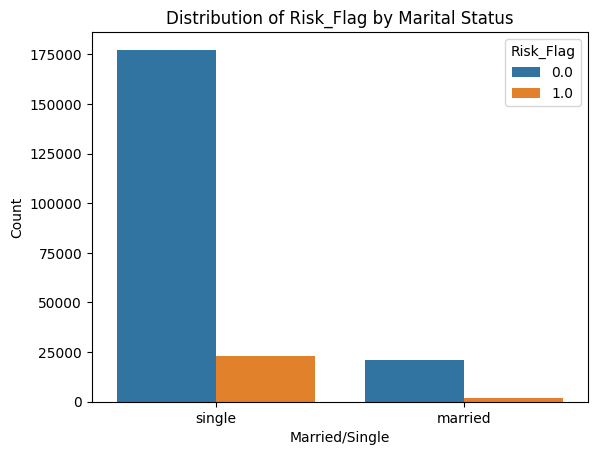

In [25]:
sns.countplot(data=bank_details, x='Married/Single', hue='Risk_Flag')
plt.xlabel('Married/Single')
plt.ylabel('Count')
plt.title('Distribution of Risk_Flag by Marital Status')
plt.legend(title='Risk_Flag', loc='upper right')
plt.show()





**The distribution of Risk Flag by Marital status is such that a single individual is most likely to default payment of a personal loan. This implies that Alpha dreamers Bank should be warry of clients who are not yet married or do not show potential of engaging in a companionship. It can be explained that a single individual is most likely to make biased fanancial decisions**

2.**HOW DOES RISK FLAG VARY WITH HOUSE OWNERSHIP**

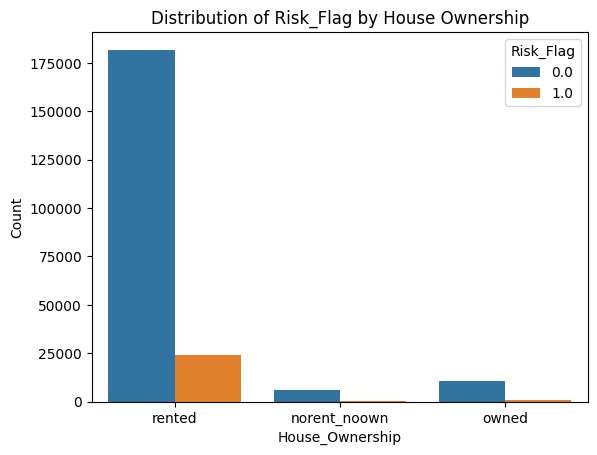

In [26]:
sns.countplot(data=bank_details, x='House_Ownership', hue='Risk_Flag')
plt.xlabel('House_Ownership')
plt.ylabel('Count')
plt.title('Distribution of Risk_Flag by House Ownership')
plt.legend(title='Risk_Flag', loc='upper right')
plt.show()


**THE OBSERVATION ABOVE HIGHLIGHTS THAT INDIVIDUALS WHO LIVE IN RENTED ACCOMODATION ARE PRONE TO DEFAULTING PERSONAL LOANS. Individuals living in rented accommodation may be more likely to default on a personal loan compared to those who own their accommodation due to factors such as financial instability, lack of long-term commitment, potential lower creditworthiness, socio-economic differences, and psychological influences related to homeownership and financial responsibility**

3.**WHAT IS THE DISTRIBUTION OF RISK FLAG ACCORDING TO AGE GROUPS OF CLIENTS**

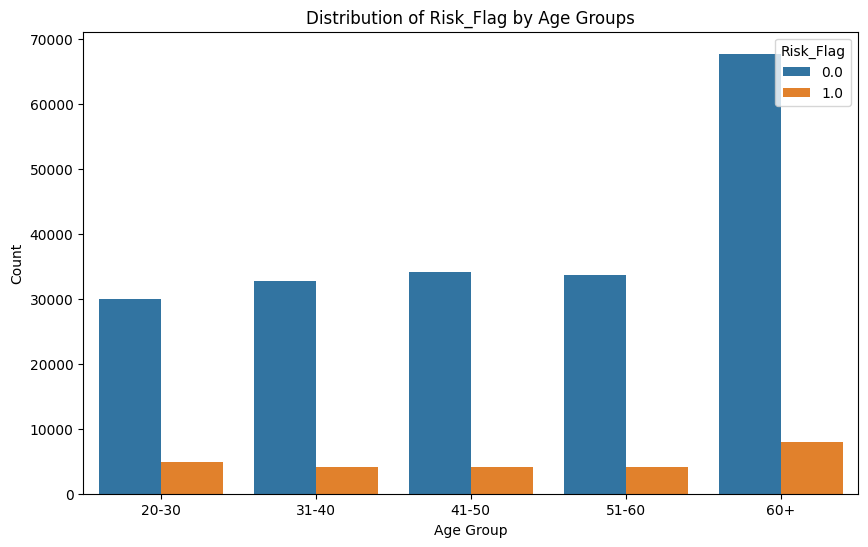

In [27]:
# Create age bins
bins = [20, 30, 40, 50, 60, 100]
labels = ['20-30', '31-40', '41-50', '51-60', '60+']
bank_details['Age_Group'] = pd.cut(bank_details['Age'], bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=bank_details, x='Age_Group', hue='Risk_Flag', order=labels)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Risk_Flag by Age Groups')
plt.legend(title='Risk_Flag', loc='upper right')
plt.show()

**IN TERMS OF ASSESING BANK DEFAULTS ACCORDING TO THE VARIOUS AGES OF THE BANK`S CLIENTS, IT IS EVIDENT THAT INDIVIDUALS OF AGE 60 AND ABOVE TEND TO DEFAULT PERSONAL LOANS THE MOST. THIS COULD BE BECAUSE, MAJORIRY OF INDIVIDIUALS IN THIS AGE GROUP ARE RECENTLY RETIRED AND LONG RETIRED PEOPLE WHO MAY HAVE NOT SUBSTANTIALLY AMMASED FINANCIAL ASSETS TO PROVIDE THEM WITH THE NECESSARY LEVERAGE TO MAKE CERTAIN FINANCIAL DESICIONS***

4. **HOW DOES WORK EXPERIENCE SHAPE CREDIT WORTHINESS**

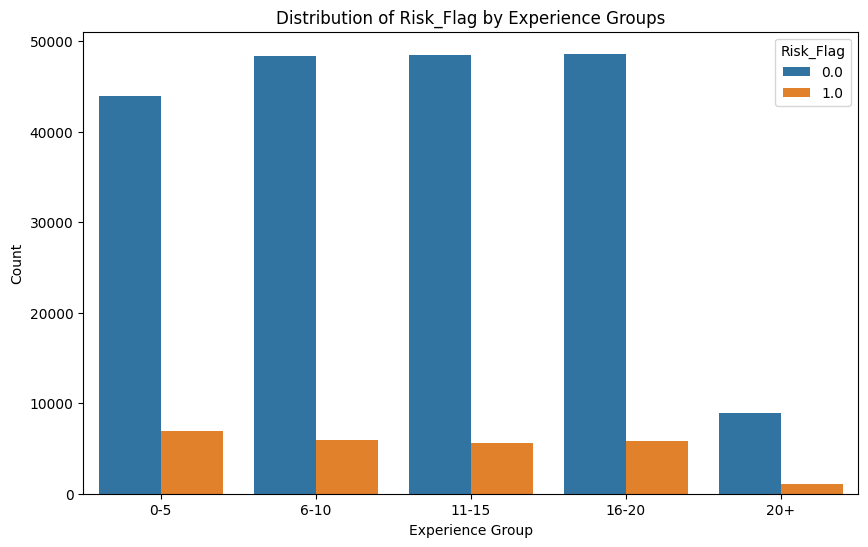

In [28]:
# Create experience bins
exp_bins = [0, 5, 10, 15, 20, 30]
exp_labels = ['0-5', '6-10', '11-15', '16-20', '20+']
bank_details['Experience_Group'] = pd.cut(bank_details['Experience'], bins=exp_bins, labels=exp_labels, right=False)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=bank_details, x='Experience_Group', hue='Risk_Flag', order=exp_labels)
plt.xlabel('Experience Group')
plt.ylabel('Count')
plt.title('Distribution of Risk_Flag by Experience Groups')
plt.legend(title='Risk_Flag', loc='upper right')
plt.show()


**Clients with 0-20 years of work experience are more likely to default on personal bank loans compared to those with 20+ years of experience due to factors such as financial instability, lower income levels, and higher living expenses early in their careers. Experienced workers typically have higher income, established credit history, and better financial management skills, leading to greater loan repayment capabilities**

TASK 3 AND 4 : Develop machine learning model - logistic regression.
 Evaluate performance of the logistic regression model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder




# Split the data into training and test sets
X = bank_details.drop('Risk_Flag', axis=1)
y = bank_details['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
# Feature importances
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.show()


In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in bank_details.columns:
    if bank_details[column].dtype == 'object':
        le = LabelEncoder()
        bank_details[column] = le.fit_transform(bank_details[column])
        label_encoders[column] = le


In [37]:
from sklearn.model_selection import train_test_split

X = bank_details.drop('Risk_Flag', axis=1)
y = bank_details['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:


# Split the data into features (X) and target (y)
X = bank_details.drop('Risk_Flag', axis=1)
y = bank_details['Risk_Flag']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=10000, random_state=42)

# Train the model
logreg.fit(X_train, y_train)


ValueError: could not convert string to float: '20-30'

In [41]:
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)


In [42]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column] = label_encoder.fit_transform(X_train[column])
        X_test[column] = label_encoder.transform(X_test[column])
